This notebook illustrates how to use Sympy, a Python-based symbolic computation system, to solve the LOCAL JOB SHOP problem from Hillier and Lieberman, Section 11.3.  For students of _Operations Research_: the use of Sympy is not for examination.  I include this example as you might find it useful for other work, and to give a short example for the dynamic programming paradigm to clarify the structure of an otherwise rather messy computation.

We begin by setting up the Sympy environment:

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6 (Python 3.4.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In Sympy, symbolic variables have to be declared.  For us, the employment levels $x_1$ (summer), $x_2$ (autumn), and $x_3$ (winter) are the decision variables.  We declare them as symbolic variables as follows:

In [2]:
x1,x2,x3 = symbols('x_1 x_2 x_3')

We start at the final stage $n=4$ of the job shop problem, the transition of employment level from $x_3$ in the winter to $x_4^*=255$ in the spring.  Since there is no excess employment cost for the spring, the only cost is the hire-or-fire expense.  Thus, we get for $f_4^*$:

In [3]:
f4s = 200*(255-x3)**2

At the pre-final stage $n=3$, the transition of employment from $x_2$ in the autumn to $x_3$ in the winter is the sum of three terms.  First, the hire-or-fire expense, then the cost of over-employment, and the optimal future costs $f_4^*(x_3)$.  The resulting expression for $f_3(x_2,x_3)$ is the following:

In [4]:
f3 = 200*(x2-x3)**2 + 2000*(x3-200) + f4s

Since $f_3$ is a quadratic function of $x_3$, we find the minimum cost by taking the derivative and finding its root $x_3^*$:

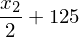

In [5]:
x3s = solve(diff(f3,x3),x3)[0]
x3s

The corresponding optimal cost $f_3^*(x_2)$ is obtained by substituting $x_3^*$ into the expression for $f_3$:

In [6]:
f3s = f3.subs(x3,x3s)
simplify(f3s)

To conclude the stage $n=3$ computation, we verify that the computed $x_3^*$ will always lie in the permissible interval $x_3 \in [200,255]$.  Indeed, since $x_2 \in [240,255]$, we find that $x_3^*$ is in the following interval:

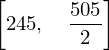

In [7]:
[x3s.subs(x2,240),x3s.subs(x2,255)]

We continue our backward recursion at stage $n=2$.  Following the pattern above, we write out the expression for $f_2(x_1,x_2)$ and compute its minimum with respect to $x_2$:

In [8]:
f2 = 200*(x1-x2)**2 + (x2-240)*2000 + f3s
x2s = solve(diff(f2,x2),x2)[0]
f2s = f2.subs(x2,x2s)

Noting that $x_1 \in [220,255]$ and therefore

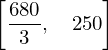

In [9]:
[x2s.subs(x1,220),x2s.subs(x1,255)]

so that $x_2^*$ may lie outside its allowed interval $x_2 \in [240,255]$, we compute the minimum value for $x_1$ such that the $x_2^*$ obtained above is valid:

In [10]:
solve(x2s-240,x1)

Thus, for $x_1 \in [220,240]$, we need to set $x_2^*=240$ and, correspondingly, $f_2^*(x_1) = f_2(x_1,240)$.

In [11]:
f2s_alt = f2.subs(x2,240)

Now at stage $n=1$, we need to follow both stage $n=2$ cases separately.  Since we know that $x_0=255$ (this is again spring employment), we find for the case $x_1 \in [240,255]$:

In [12]:
f1 = 200*(255-x1)**2 + (x1-220)*2000 + f2s
x1s = solve(diff(f1,x1),x1)[0]
N(x1s)

Thus, the computed $x_1^*$ lies in the interval of validity of the corresponding $f_2^*$, so that $f_1^*$ is given by

In [13]:
f1s = f1.subs(x1,x1s)
f1s

Likewise, for the alternative case $x_1 \in [220,240]$, we compute

In [14]:
f1_alt = 200*(255-x1)**2 + (x1-220)*2000 + f2s_alt
x1s_alt = solve(diff(f1_alt,x1),x1)[0]
N(x1s_alt)

This value is to the right of the interval of validity.  As the corresponding $f_1^*$ is decreasing to the left of $x_1=245$, the minimum is attained at $x_1^*=240$, namely

In [15]:
f1.subs(x1,240)

This is larger than the first alternative, so we can discard this alternative case.  Thus, the optimal cost over one year is $f_1^*=185\,000$ while $x_1^*=247.5$ as computed above.  Further, $x_2^*$ equals

In [16]:
x2s.subs(x1,x1s)

and $x_3^*$ equals

In [17]:
N(x3s.subs(x2,x2s).subs(x1,x1s))